<a href="https://colab.research.google.com/github/mpasdan/thesis-code/blob/main/mpasdanisThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###MPASDANIS NIKOLAOS

**THESIS**




In [2]:
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from pylab import rcParams
from sklearn.cluster import KMeans
import seaborn as sns

#Total Matches / Year

In [3]:
matches_by_year = {}

for year in range(2002, 2024):
    filename = f'/content/drive/MyDrive/Colab Notebooks/nvdcve-1.1-{year}.json'
    with open(filename, 'r') as f:
        data = json.load(f)

    matches = 0
    for item in data['CVE_Items']:
      published_date = item['publishedDate'][:4]
      if (published_date == str(year)):
          matches += 1
    matches_by_year[year] = matches

with open('matches_by_year.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Year', 'Matches'])
    for year, matches in matches_by_year.items():
        writer.writerow([year, matches])

In [4]:
data = pd.read_csv('matches_by_year.csv')
data = data.drop_duplicates()
data = data.dropna()
print(data)

    Year  Matches
0   2002     2169
1   2003     1345
2   2004     2318
3   2005     4662
4   2006     6659
5   2007     6231
6   2008     5426
7   2009     4174
8   2010     3993
9   2011     3366
10  2012     4288
11  2013     4548
12  2014     6522
13  2015     5609
14  2016     5587
15  2017    10959
16  2018    12717
17  2019    13373
18  2020    14377
19  2021    16439
20  2022    20136
21  2023     6063


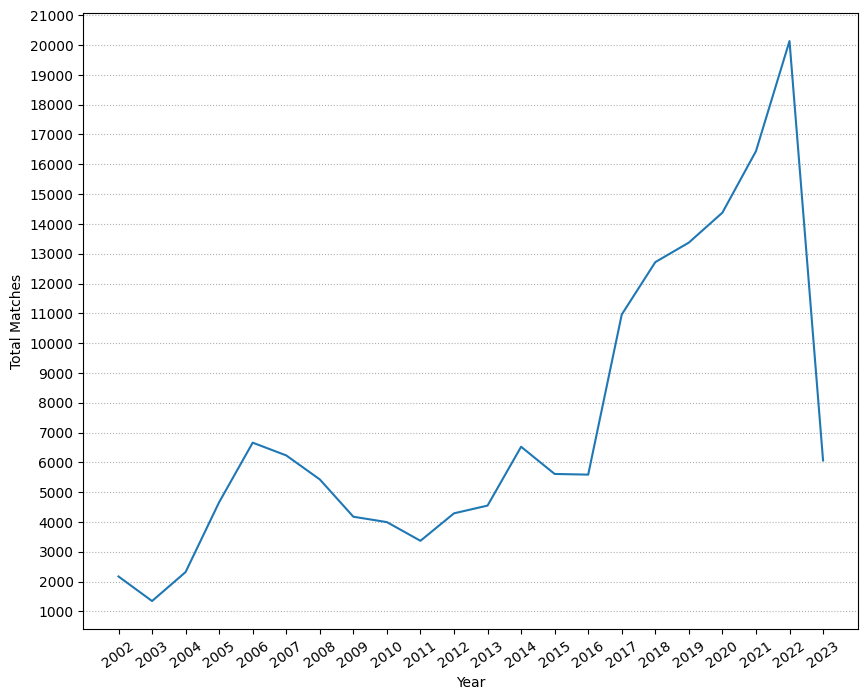

In [5]:
plt.figure(figsize=(10,8))
data = pd.read_csv('matches_by_year.csv')
plt.plot(data['Year'], data['Matches'])
plt.xticks(list(matches_by_year.keys()), rotation=35)
plt.xlabel('Year')
plt.ylabel('Total Matches')
plt.yticks([i*1000 for i in range(1, 22)])
plt.grid(axis='y', linestyle='dotted')
plt.show()

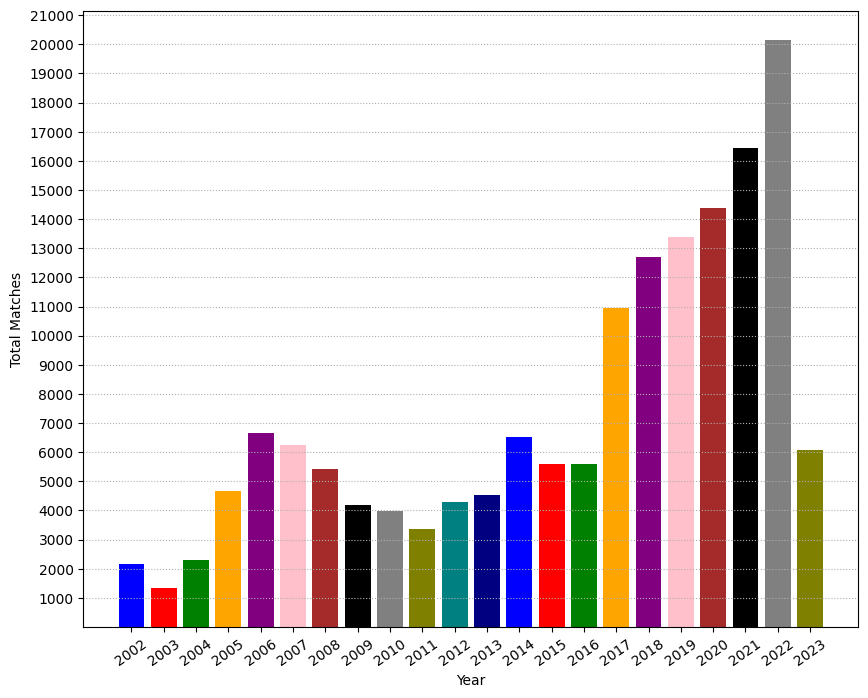

In [6]:
plt.figure(figsize=(10,8))
plt.bar(matches_by_year.keys(), matches_by_year.values(), color=['blue','red','green','orange','purple','pink','brown','black','gray','olive','teal','navy'])
plt.xticks(list(matches_by_year.keys()), rotation=35)
plt.xlabel('Year')
plt.ylabel('Total Matches')
plt.yticks([i*1000 for i in range(1, 22)])
plt.grid(axis='y', linestyle='dotted')
plt.show()

#Total Security Vulnerabilities / Attack Vector

In [7]:
total_attack_vectors = {'Network': [], 'Adjacent': [], 'Local': [], 'Physical': []}

totalnetwork = 0
totaladjacent = 0
totallocal = 0
totalphysical = 0
# Parse NVD data feed files for years 2002 to 2023
for year in range(2002, 2024):
    filename = f'/content/drive/MyDrive/Colab Notebooks/nvdcve-1.1-{year}.json'
    with open(filename, 'r') as f:
        year_data = json.load(f)

    for item in year_data['CVE_Items']:
      published_date = item['publishedDate'][:4]
      if published_date == str(year) :
        if 'baseMetricV3' in item['impact']:
            attack_vector  = item['impact']['baseMetricV3']['cvssV3']['attackVector']
        elif 'baseMetricV2' in item['impact']:
            attack_vector  = item['impact']['baseMetricV2']['cvssV2']['accessVector']
        if attack_vector == 'NETWORK':
            totalnetwork += 1
        elif attack_vector == 'ADJACENT_NETWORK':
            totaladjacent += 1
        elif attack_vector == 'LOCAL':
            totallocal += 1
        elif attack_vector == 'PHYSICAL':
            totalphysical += 1

total_attack_vectors = {'local': totallocal, 'network': totalnetwork, 'physical': totalphysical, 'adjacent': totaladjacent}

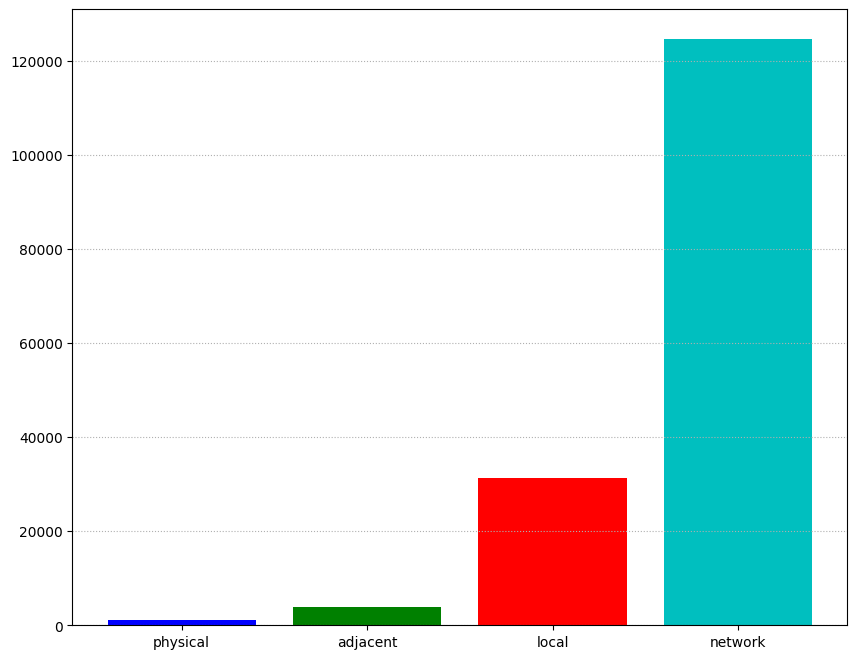

In [8]:
sorted_dictionary = dict(sorted(total_attack_vectors.items(),key=lambda x: x[1]))
plt.figure(figsize=(10,8))
colors = ['b', 'g', 'r', 'c']
plt.grid(axis='y', linestyle='dotted')
plt.bar(sorted_dictionary.keys(), sorted_dictionary.values(), color=colors)
plt.show()


# Clustering between CVSS Score and Exploitability Score



In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
with open('/content/drive/MyDrive/Colab Notebooks/nvdcve-1.1-2022.json', 'r') as file:
    data = pd.read_json(file)

data.to_csv('output_file.csv', index=False)

In [15]:
cve_items = data['CVE_Items']

In [16]:
selected_data = []
for item in cve_items :
    cve_data = item['cve']['CVE_data_meta']
    if 'baseMetricV3' in item['impact']:
          exploitabilityScore  = item['impact']['baseMetricV3']['exploitabilityScore']
    elif 'baseMetricV2' in item['impact']:
          exploitabilityScore  = item['impact']['baseMetricV2']['exploitabilityScore']
    if 'baseMetricV3' in item['impact']:
          cvss_score  = item['impact']['baseMetricV3']['cvssV3']['baseScore']
    elif 'baseMetricV2' in item['impact']:
          cvss_score  = item['impact']['baseMetricV2']['cvssV2']['baseScore']
    selected_data.append({
        'ExploitabilityScore': exploitabilityScore,
        'Cvss_score': cvss_score
    })

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


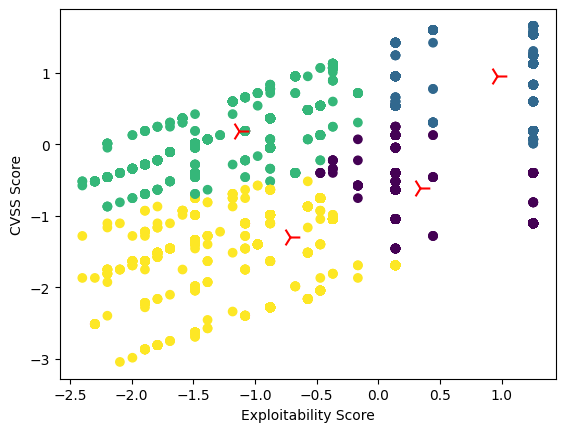

In [17]:
df = pd.DataFrame(selected_data)

X = df[['ExploitabilityScore', 'Cvss_score']]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

colors = ['red', 'green', 'blue', 'orange']
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='4', s=200, c='red')
plt.xlabel('Exploitability Score')
plt.ylabel('CVSS Score')
plt.show()

# Clustering between CVSS Score Impact Score

In [18]:
selected_data = []
for item in cve_items :
    cve_data = item['cve']['CVE_data_meta']
    if 'baseMetricV3' in item['impact']:
          impactScore  = item['impact']['baseMetricV3']['impactScore']
    elif 'baseMetricV2' in item['impact']:
          impactScore  = item['impact']['baseMetricV2']['impactScore']
    if 'baseMetricV3' in item['impact']:
          cvss_score  = item['impact']['baseMetricV3']['cvssV3']['baseScore']
    elif 'baseMetricV2' in item['impact']:
          cvss_score  = item['impact']['baseMetricV2']['cvssV2']['baseScore']
    selected_data.append({
        'impactScore': impactScore,
        'Cvss_score': cvss_score
    })

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


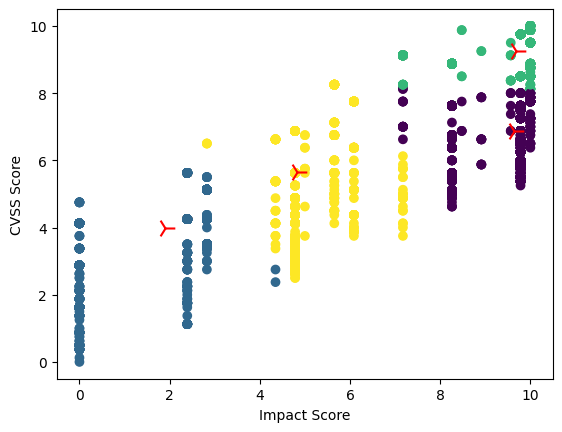

In [19]:
df = pd.DataFrame(selected_data)
X = df[['impactScore', 'Cvss_score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

scaler = MinMaxScaler(feature_range=(0, 10))
X_scaled = scaler.fit_transform(X)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

colors = ['red', 'green', 'blue', 'orange']
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='4', s=200, c='red')
plt.xlabel('Impact Score')
plt.ylabel('CVSS Score')
plt.show()

# Clustering between between Exploitability Score and Impact Score

In [20]:
selected_data = []
for item in cve_items :
    cve_data = item['cve']['CVE_data_meta']
    if 'baseMetricV3' in item['impact']:
          impactScore  = item['impact']['baseMetricV3']['impactScore']
    elif 'baseMetricV2' in item['impact']:
          impactScore  = item['impact']['baseMetricV2']['impactScore']
    if 'baseMetricV3' in item['impact']:
          exploitabilityScore  = item['impact']['baseMetricV3']['exploitabilityScore']
    elif 'baseMetricV2' in item['impact']:
          exploitabilityScore  = item['impact']['baseMetricV2']['exploitabilityScore']
    selected_data.append({
        'impactScore': impactScore,
        'exploitabilityScore': exploitabilityScore
    })

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


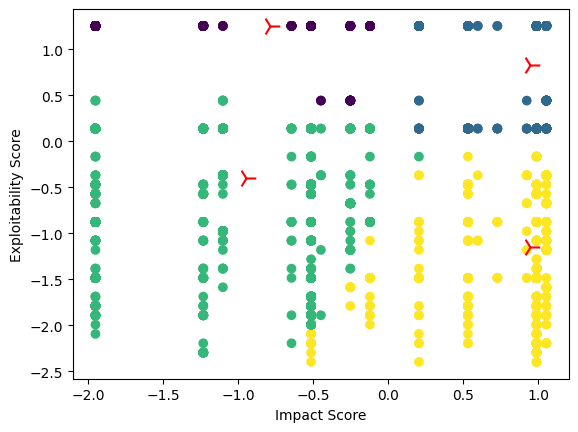

In [21]:
df = pd.DataFrame(selected_data)
X = df[['impactScore', 'exploitabilityScore']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

colors = ['red', 'green', 'blue', 'orange']
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='4', s=200, c='red')
plt.xlabel('Impact Score')
plt.ylabel('Exploitability Score')
plt.show()

#Number of Vulnerabilities by Attack Vector Per Year


In [22]:
attack_vectors = {'Network': [], 'Adjacent': [], 'Local': [], 'Physical': []}

totalnetwork = 0
totaladjacent = 0
totallocal = 0
totalphysical = 0
# Parse NVD data feed files for years 2002 to 2023
for year in range(2002, 2024):
    filename = f'/content/drive/MyDrive/Colab Notebooks/nvdcve-1.1-{year}.json'
    with open(filename, 'r') as f:
        covid_period_data = json.load(f)

    # Count the number of vulnerabilities in each attack vector category
    network_count = 0
    adjacent_count = 0
    local_count = 0
    physical_count = 0
    for item in covid_period_data['CVE_Items']:
      published_date = item['publishedDate'][:4]
      if published_date == str(year) :
        if 'baseMetricV3' in item['impact']:
            attack_vector  = item['impact']['baseMetricV3']['cvssV3']['attackVector']
        elif 'baseMetricV2' in item['impact']:
            attack_vector  = item['impact']['baseMetricV2']['cvssV2']['accessVector']
        if attack_vector == 'NETWORK':
            network_count += 1
            totalnetwork += 1
        elif attack_vector == 'ADJACENT_NETWORK':
            adjacent_count += 1
            totaladjacent += 1
        elif attack_vector == 'LOCAL':
            local_count += 1
            totallocal += 1
        elif attack_vector == 'PHYSICAL':
            physical_count += 1
            totalphysical += 1

    # Add the counts to the dictionary

    attack_vectors['Network'].append(network_count)
    attack_vectors['Adjacent'].append(adjacent_count)
    attack_vectors['Local'].append(local_count)
    attack_vectors['Physical'].append(physical_count)

dictionary = {'local': totallocal, 'network': totalnetwork, 'physical': totalphysical, 'adjacent': totaladjacent}



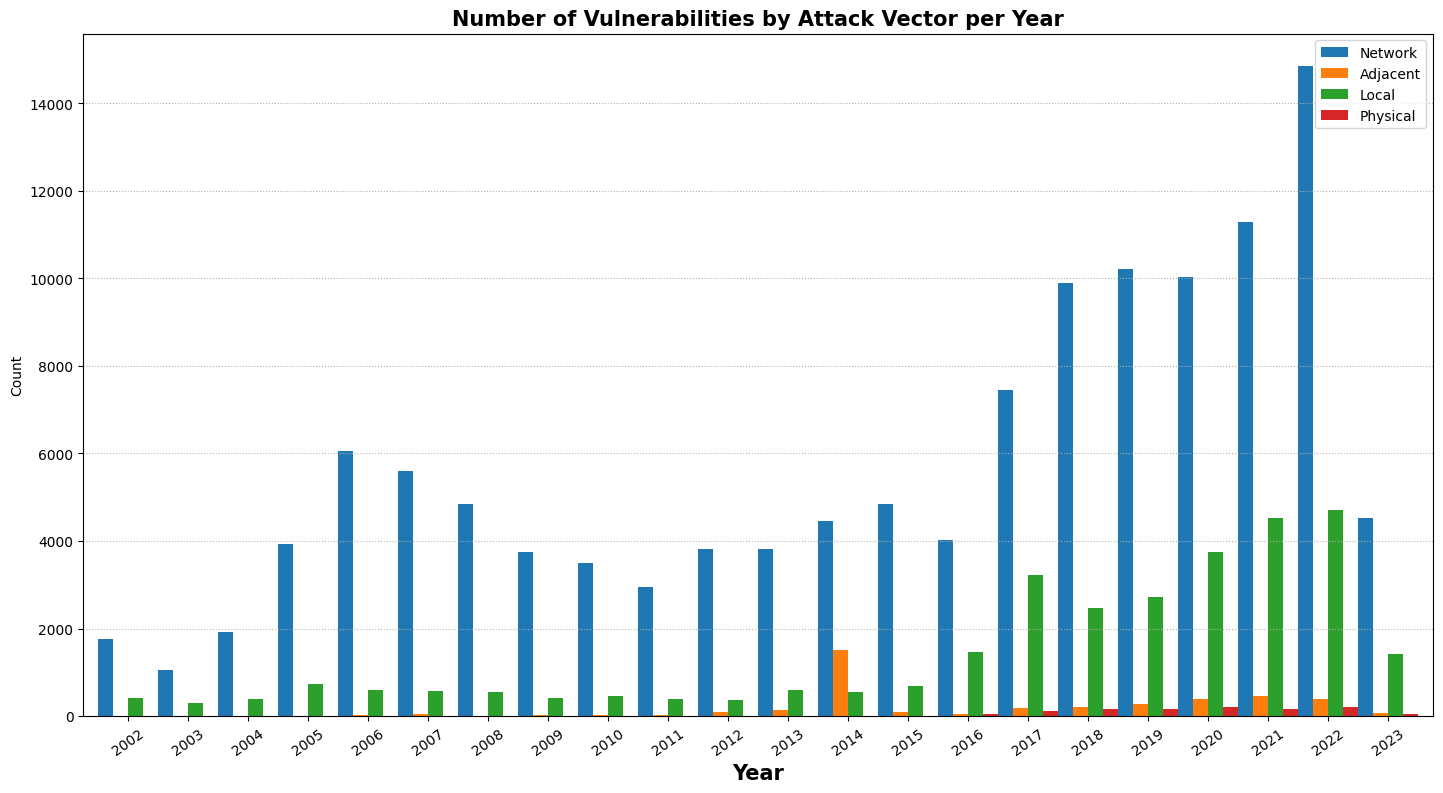

In [23]:
df = pd.DataFrame(attack_vectors, index=range(2002, 2024))
ax = df.plot.bar(rot=0, width = 1.0)
plt.xticks(rotation=35)
ax.set_xlabel('Year', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Count')
ax.set_title('Number of Vulnerabilities by Attack Vector per Year', fontweight ='bold', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(15, 10.5)
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.75)
plt.grid(axis='y', linestyle='dotted')
plt.show()

#Number of Vulnerabilities by Severity Per year

In [24]:
severity_statistics = {'CRITICAL': [], 'HIGH':[], 'MEDIUM':[], 'LOW':[]}

# Parse NVD data feed files for years 2002 to 2023
for year in range(2002, 2024):
    filename = f'/content/drive/MyDrive/Colab Notebooks/nvdcve-1.1-{year}.json'
    with open(filename, 'r') as f:
        year_data = json.load(f)

    # Count the number of vulnerabilities in each attack vector category
    severity_high = 0
    severity_critical = 0
    severity_medium = 0
    severity_low = 0
    for item in year_data['CVE_Items']:
      published_date = item['publishedDate'][:4]
      if published_date == str(year) :
        if 'baseMetricV3' in item['impact']:
            severity  = item['impact']['baseMetricV3']['cvssV3']['baseSeverity']
        elif 'baseMetricV2' in item['impact']:
            severity  = item['impact']['baseMetricV2']['severity']
        if severity == 'HIGH':
            severity_high += 1
        elif severity == 'MEDIUM':
            severity_medium += 1
        elif severity == 'CRITICAL':
            severity_critical += 1
        elif severity == 'LOW':
            severity_low += 1

    # Add the counts to the dictionary

    severity_statistics['CRITICAL'].append(severity_critical)
    severity_statistics['HIGH'].append(severity_high)
    severity_statistics['MEDIUM'].append(severity_medium)
    severity_statistics['LOW'].append(severity_low)

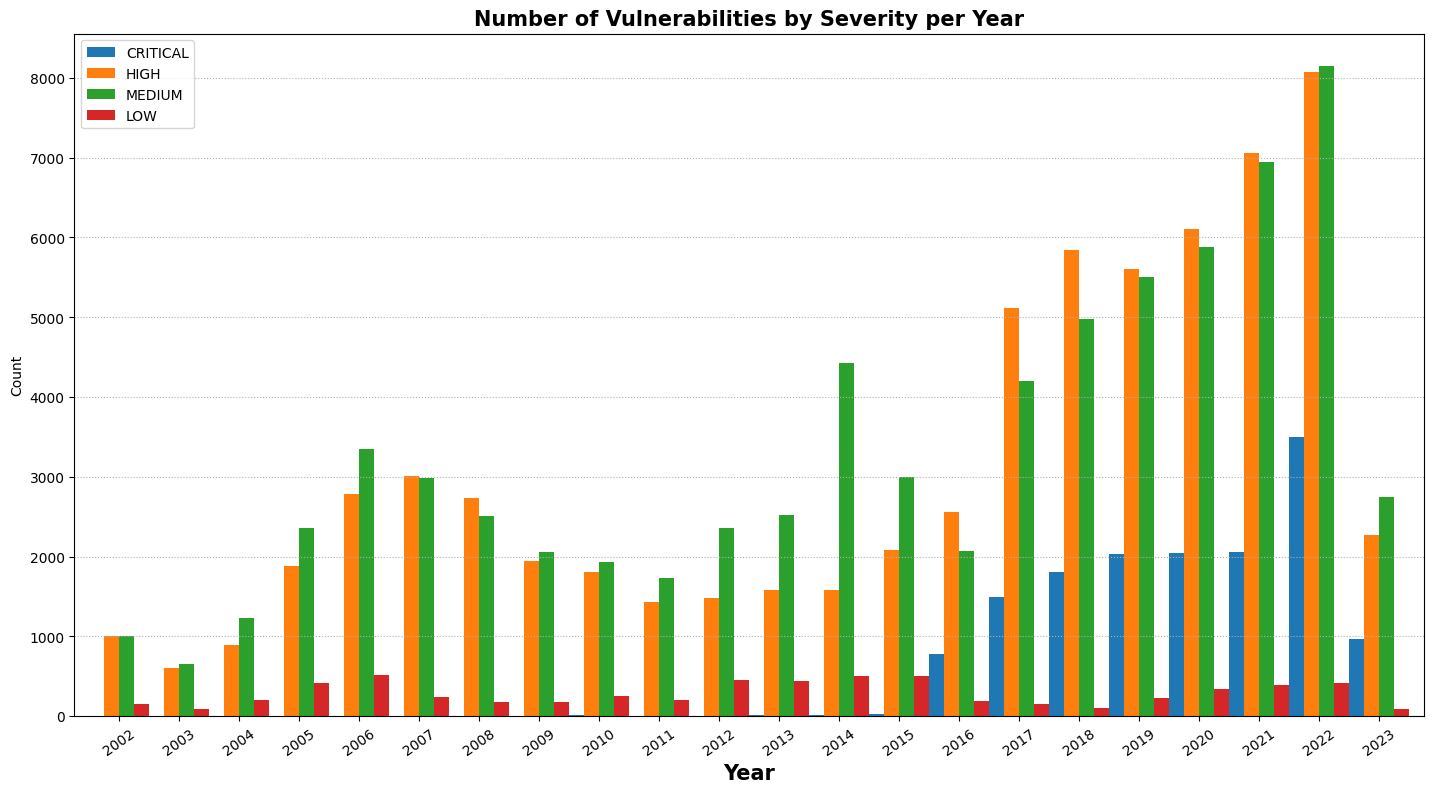

In [25]:
df = pd.DataFrame(severity_statistics, index=range(2002, 2024))
ax = df.plot.bar(rot=0, width = 1.0)
plt.xticks(rotation=35)
ax.set_xlabel('Year', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Count')
ax.set_title('Number of Vulnerabilities by Severity per Year', fontweight ='bold', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(15, 10.5)
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.75)
plt.grid(axis='y', linestyle='dotted')
plt.show()

#Descriptive Statistics Per Year


1.   Mean
2.   Median
3.   Standard deviation
4.   Min Score
5.   Max Score




In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Parse NVD data feed files for years 2002 to 2023
data = []
for year in range(2002, 2024):
    filename = f'/content/drive/MyDrive/Colab Notebooks/nvdcve-1.1-{year}.json'
    with open(filename, 'r') as f:
        year_data = json.load(f)

    for item in year_data['CVE_Items']:
      published_date = item['publishedDate'][:4]
      if published_date == str(year) :
        if 'baseMetricV3' in item['impact']:
            cvss_score  = item['impact']['baseMetricV3']['cvssV3']['baseScore']
        elif 'baseMetricV2' in item['impact']:
            cvss_score  = item['impact']['baseMetricV2']['cvssV2']['baseScore']
        cve_id = item['cve']['CVE_data_meta']['ID']
        data.append({'cve_id': cve_id, 'cvss_score': cvss_score, 'year': year})

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the mean CVSS score for each year
mean_scores = df.groupby('year')['cvss_score'].mean()

In [27]:
# Assuming you have a DataFrame called 'vulnerabilities' with a 'cvss_score' column

# Calculate mean
mean_score = df.groupby('year')['cvss_score'].mean()

# Calculate median
median_score = df.groupby('year')['cvss_score'].median()



# Calculate standard deviation
std_deviation = df.groupby('year')['cvss_score'].std()

# Calculate minimum and maximum values
min_score = df.groupby('year')['cvss_score'].min()
max_score = df.groupby('year')['cvss_score'].max()

# Print the results
print("Mean:", mean_score)
print("Median:", median_score)
print("Standard Deviation:", std_deviation)
print("Minimum Score:", min_score)
print("Maximum Score:", max_score)

Mean: year
2002    6.148778
2003    6.186989
2004    5.924202
2005    5.792728
2006    6.101937
2007    6.635917
2008    6.668614
2009    6.572017
2010    6.571926
2011    6.506447
2012    6.150770
2013    6.161851
2014    5.828626
2015    6.332216
2016    7.210936
2017    7.270344
2018    7.308980
2019    7.239101
2020    7.123572
2021    7.056883
2022    7.198212
2023    7.088504
Name: cvss_score, dtype: float64
Median: year
2002    6.4
2003    6.4
2004    5.0
2005    5.0
2006    6.4
2007    6.8
2008    7.1
2009    6.8
2010    6.8
2011    6.8
2012    5.8
2013    6.0
2014    5.4
2015    6.8
2016    7.5
2017    7.5
2018    7.5
2019    7.5
2020    7.5
2021    7.4
2022    7.5
2023    7.2
Name: cvss_score, dtype: float64
Standard Deviation: year
2002    1.889488
2003    1.928306
2004    2.011807
2005    1.857805
2006    1.831849
2007    1.877458
2008    1.927608
2009    2.022277
2010    2.141982
2011    2.183920
2012    2.248643
2013    2.178528
2014    1.820509
2015    2.157207
2016    1

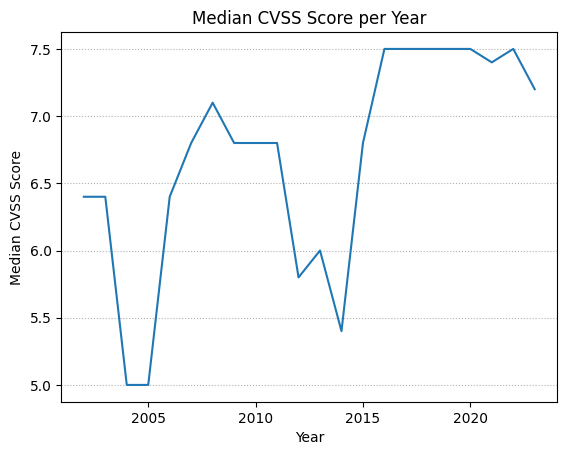

In [28]:
# Plot the median CVSS scores
plt.plot(median_score.index, median_score.values)
plt.xlabel('Year')
plt.ylabel('Median CVSS Score')
plt.title('Median CVSS Score per Year')
plt.grid(axis='y', linestyle='dotted')
plt.show()

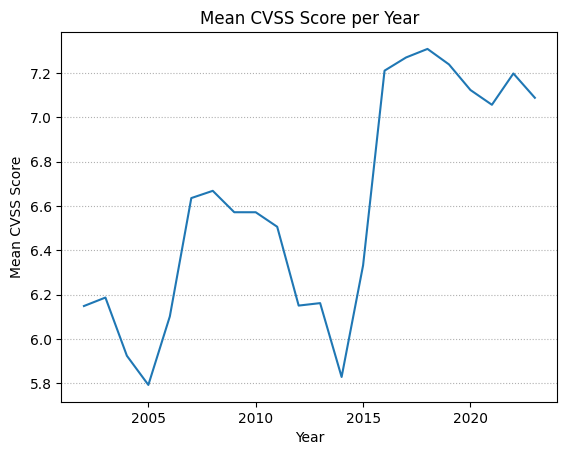

In [29]:
# Plot the mean CVSS scores
plt.plot(mean_scores.index, mean_scores.values)
plt.xlabel('Year')
plt.ylabel('Mean CVSS Score')
plt.title('Mean CVSS Score per Year')
plt.grid(axis='y', linestyle='dotted')
plt.show()

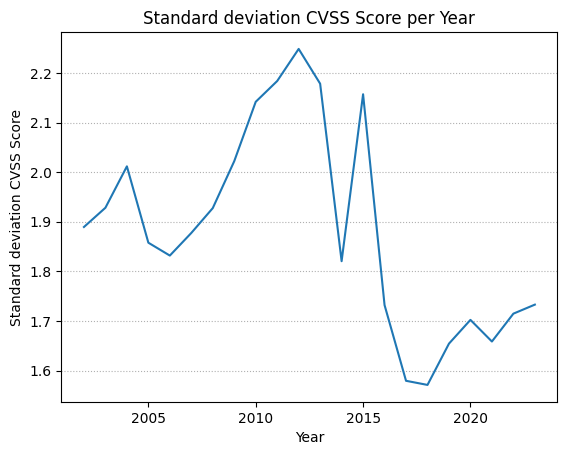

In [30]:
# Plot the Standard deviation CVSS scores
plt.plot(std_deviation.index, std_deviation.values)
plt.xlabel('Year')
plt.ylabel('Standard deviation CVSS Score')
plt.title('Standard deviation CVSS Score per Year')
plt.grid(axis='y', linestyle='dotted')
plt.show()

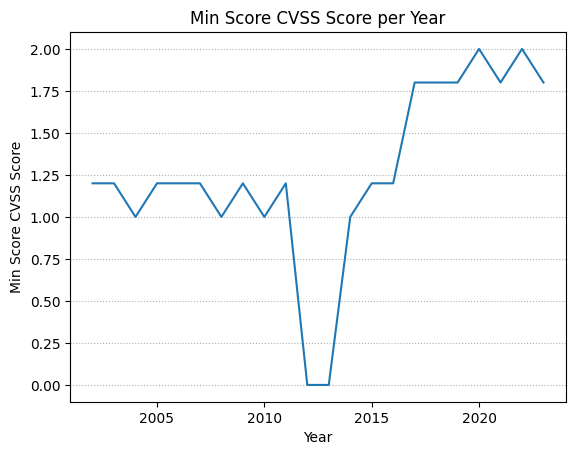

In [31]:
# Plot the min CVSS scores
plt.plot(min_score.index, min_score.values)
plt.xlabel('Year')
plt.ylabel('Min Score CVSS Score')
plt.title('Min Score CVSS Score per Year')
plt.grid(axis='y', linestyle='dotted')
plt.show()

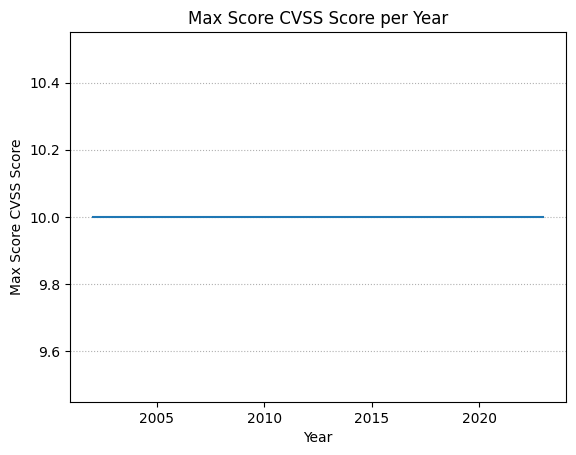

In [32]:
# Plot the max CVSS scores
plt.plot(max_score.index, max_score.values)
plt.xlabel('Year')
plt.ylabel('Max Score CVSS Score')
plt.title('Max Score CVSS Score per Year')
plt.grid(axis='y', linestyle='dotted')
plt.show()